In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#import missingno as msg

from sklearn.model_selection import RandomizedSearchCV , train_test_split , cross_val_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , ExtraTreesClassifier
#import lightgbm as lgbm

from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [3]:
df_train = pd.read_csv("train_LZdllcl.csv")
df_test = pd.read_csv("test_2umaH9m.csv")
#sub = pd.read_csv("sample_submission")

In [4]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
print(df_train.shape)

(54808, 14)


In [6]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
df_test.shape

(23490, 13)

In [8]:
#describe
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
#info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
#check nan
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
df_train["employee_id"].value_counts() > 2

2047     False
19228    False
4887     False
6934     False
789      False
         ...  
71176    False
44543    False
48637    False
36347    False
4098     False
Name: employee_id, Length: 54808, dtype: bool

In [13]:
df_train[df_train['employee_id'].duplicated() == True]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [14]:
df_test[df_train['employee_id'].duplicated() == True]

/Users/rk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score


In [15]:
df_train.drop(["employee_id"] ,axis =1 , inplace = True)
df_test.drop(["employee_id"] ,axis =1 , inplace = True)

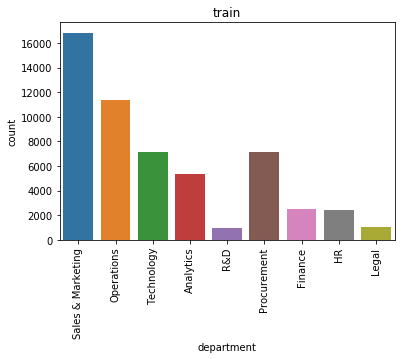

In [16]:
sb.countplot(df_train["department"])
plt.xticks(rotation = 90)
plt.title("train")
plt.show()

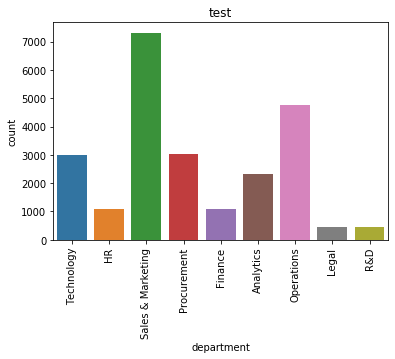

In [17]:
sb.countplot(df_test["department"])
plt.xticks(rotation = 90)
plt.title("test")
plt.show()

In [18]:
df_train.groupby('department')["is_promoted"].mean().sort_values(ascending = False)

department
Technology           0.107593
Procurement          0.096386
Analytics            0.095665
Operations           0.090148
Finance              0.081230
Sales & Marketing    0.072031
R&D                  0.069069
HR                   0.056245
Legal                0.051011
Name: is_promoted, dtype: float64

In [19]:
df_train['is_promoted'].unique()

array([0, 1])

In [20]:
dep = {
    "Technology":9 , "Procurement":8,"Analytics":7,"Operations":6,"Finance":5,"Sales & Marketing":4,"R&D":3,"HR":2,"Legal":1
}
df_train.loc[: , 'department'] = df_train.loc[: , 'department'].map(dep)
df_test.loc[: , 'department'] = df_test.loc[: , 'department'].map(dep)

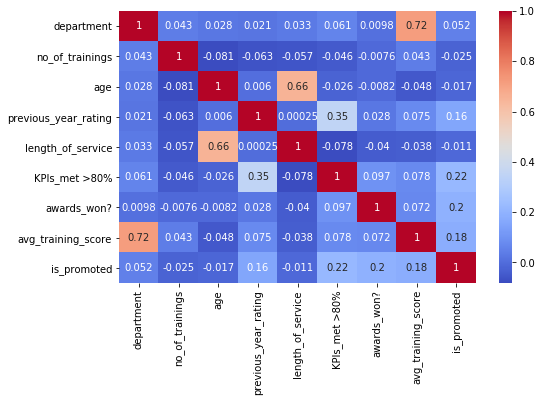

In [21]:
plt.figure(figsize = (8,5))
sb.heatmap(df_train.corr() , annot =True , cmap = "coolwarm")

In [22]:
#region
df_train["region"]

0         region_7
1        region_22
2        region_19
3        region_23
4        region_26
           ...    
54803    region_14
54804    region_27
54805     region_1
54806     region_9
54807    region_22
Name: region, Length: 54808, dtype: object

In [23]:
print(df_train["region"].unique())


['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


In [24]:
print(df_train.groupby('region')["is_promoted"].mean().sort_values(ascending =False))

region
region_4     0.144451
region_17    0.136935
region_25    0.125763
region_28    0.116844
region_23    0.116596
region_22    0.114188
region_3     0.106936
region_7     0.106546
region_1     0.095082
region_30    0.089802
region_13    0.086858
region_8     0.080916
region_2     0.080126
region_15    0.079060
region_27    0.078963
region_10    0.078704
region_14    0.074970
region_16    0.069625
region_12    0.066000
region_26    0.063274
region_19    0.060641
region_20    0.057647
region_31    0.056848
region_11    0.056274
region_6     0.046377
region_5     0.045692
region_21    0.043796
region_29    0.043260
region_32    0.042328
region_33    0.037175
region_24    0.035433
region_18    0.032258
region_34    0.027397
region_9     0.019048
Name: is_promoted, dtype: float64


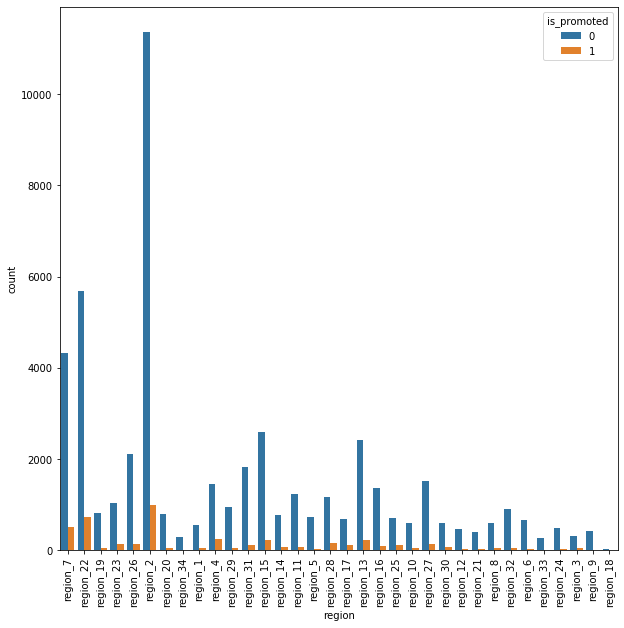

In [25]:
plt.figure(figsize = (10,10))
sb.countplot(df_train["region"] , hue = df_train["is_promoted"])
plt.xticks(rotation = 90)
plt.show()

In [26]:
df_train["region"] = df_train["region"].replace("region_4" , 5)
df_train["region"] = df_train["region"].replace("region_17",5)
df_train["region"] = df_train["region"].replace("region_25",5)
df_train["region"] = df_train["region"].replace("region_28",5)
df_train["region"] = df_train["region"].replace("region_23",5)
df_train["region"] = df_train["region"].replace("region_22",5)
df_train["region"] = df_train["region"].replace("region_3",5)
df_train["region"] = df_train["region"].replace("region_7",4)
df_train["region"] = df_train["region"].replace("region_1",4)
df_train["region"] = df_train["region"].replace("region_30",4)
df_train["region"] = df_train["region"].replace("region_13",4)
df_train["region"] = df_train["region"].replace("region_8",4)
df_train["region"] = df_train["region"].replace("region_2",4)
df_train["region"] = df_train["region"].replace("region_15",4)
df_train["region"] = df_train["region"].replace("region_27",3)
df_train["region"] = df_train["region"].replace("region_10",3)
df_train["region"] = df_train["region"].replace("region_14",3)
df_train["region"] = df_train["region"].replace("region_16",3)
df_train["region"] = df_train["region"].replace("region_12",3)
df_train["region"] = df_train["region"].replace("region_26",3)
df_train["region"] = df_train["region"].replace("region_19",3)
df_train["region"] = df_train["region"].replace("region_20",2)
df_train["region"] = df_train["region"].replace("region_31",2)
df_train["region"] = df_train["region"].replace("region_11",2)
df_train["region"] = df_train["region"].replace("region_6",2)
df_train["region"] = df_train["region"].replace("region_5",2)
df_train["region"] = df_train["region"].replace("region_21",2)
df_train["region"] = df_train["region"].replace("region_29",2)
df_train["region"] = df_train["region"].replace("region_32",1)
df_train["region"] = df_train["region"].replace("region_33",1)
df_train["region"] = df_train["region"].replace("region_24",1)
df_train["region"] = df_train["region"].replace("region_18",1)
df_train["region"] = df_train["region"].replace("region_34",1)
df_train["region"] = df_train["region"].replace("region_9",1)



df_test["region"] = df_test["region"].replace("region_4" , 5)
df_test["region"] = df_test["region"].replace("region_17",5)
df_test["region"] = df_test["region"].replace("region_25",5)
df_test["region"] = df_test["region"].replace("region_28",5)
df_test["region"] = df_test["region"].replace("region_23",5)
df_test["region"] = df_test["region"].replace("region_22",5)
df_test["region"] = df_test["region"].replace("region_3",5)
df_test["region"] = df_test["region"].replace("region_7",4)
df_test["region"] = df_test["region"].replace("region_1",4)
df_test["region"] = df_test["region"].replace("region_30",4)
df_test["region"] = df_test["region"].replace("region_13",4)
df_test["region"] = df_test["region"].replace("region_8",4)
df_test["region"] = df_test["region"].replace("region_2",4)
df_test["region"] = df_test["region"].replace("region_15",4)
df_test["region"] = df_test["region"].replace("region_27",3)
df_test["region"] = df_test["region"].replace("region_10",3)
df_test["region"] = df_test["region"].replace("region_14",3)
df_test["region"] = df_test["region"].replace("region_16",3)
df_test["region"] = df_test["region"].replace("region_12",3)
df_test["region"] = df_test["region"].replace("region_26",3)
df_test["region"] = df_test["region"].replace("region_19",3)
df_test["region"] = df_test["region"].replace("region_20",2)
df_test["region"] = df_test["region"].replace("region_31",2)
df_test["region"] = df_test["region"].replace("region_11",2)
df_test["region"] = df_test["region"].replace("region_6",2)
df_test["region"] = df_test["region"].replace("region_5",2)
df_test["region"] = df_test["region"].replace("region_21",2)
df_test["region"] = df_test["region"].replace("region_29",2)
df_test["region"] = df_test["region"].replace("region_32",1)
df_test["region"] = df_test["region"].replace("region_33",1)
df_test["region"] = df_test["region"].replace("region_24",1)
df_test["region"] = df_test["region"].replace("region_18",1)
df_test["region"] = df_test["region"].replace("region_34",1)
df_test["region"] = df_test["region"].replace("region_9",1)

In [27]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,4,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,6,5,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,4,3,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,4,5,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,9,3,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [28]:
#bins (size= 10)
category = [1,2,3,4,5]
labels = ["low","medium","high","very high"]

df_train["select_region"] = pd.cut(df_train["region"] , bins = category , labels = labels)

In [29]:
#bins (size= 10)
category = [1,2,3,4,5]
labels = ["low","medium","high","very high"]

df_test["select_region"] = pd.cut(df_test["region"] , bins = category , labels = labels)

In [30]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,select_region
0,4,4,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,high
1,6,5,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,very high
2,4,3,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,medium
3,4,5,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,very high
4,9,3,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,medium


In [31]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,select_region
0,9,3,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,medium
1,2,5,Bachelor's,f,other,1,31,3.0,5,0,0,51,very high
2,4,4,Bachelor's,m,other,1,31,1.0,4,0,0,47,high
3,8,4,Bachelor's,f,other,3,31,2.0,9,0,0,65,high
4,5,2,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,low


In [32]:
df_train["select_region"] = df_train["select_region"].replace("very high",4)
df_train["select_region"] = df_train["select_region"].replace("high",3)
df_train["select_region"] = df_train["select_region"].replace("medium",2)
df_train["select_region"] = df_train["select_region"].replace("low",1)

df_test["select_region"] = df_test["select_region"].replace("very high",4)
df_test["select_region"] = df_test["select_region"].replace("high",3)
df_test["select_region"] = df_test["select_region"].replace("medium",2)
df_test["select_region"] = df_test["select_region"].replace("low",1)

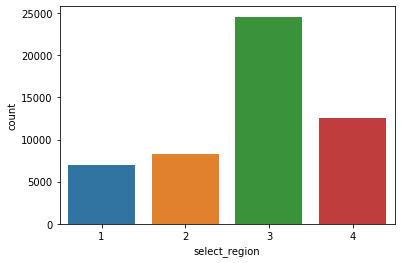

In [33]:
sb.countplot(df_train["select_region"])

In [34]:
df_train["select_region"].isna().sum()

2465

In [35]:
df_test["select_region"].isna().sum()

1133

In [36]:
df_train["select_region"].fillna(df_train["select_region"].mode()[0] , inplace =True)
df_test["select_region"].fillna(df_test["select_region"].mode()[0] , inplace =True)

In [37]:
df_train["select_region"].isna().sum()

0

In [38]:
df_test["select_region"].isna().sum()

0

In [39]:
df_train.drop(["region"] ,axis =1 , inplace =True)
df_test.drop(["region"] ,axis =1 , inplace =True)

In [40]:
#education
df_train["education"]

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [41]:
print(df_train["education"].unique())
print(df_test["education"].nunique())

["Master's & above" "Bachelor's" nan 'Below Secondary']
3


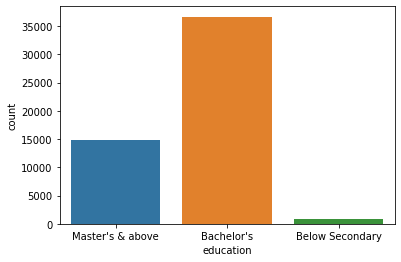

In [42]:
sb.countplot(df_train["education"])

In [43]:
df_train.groupby('education')["is_promoted"].mean().sort_values(ascending =False)

education
Master's & above    0.098559
Below Secondary     0.083230
Bachelor's          0.082031
Name: is_promoted, dtype: float64

In [44]:
df_train.loc[: , "education"] = df_train.loc[: , "education"].map({"Master's & above":3 , "Bachelor's":2,"Below Secondary ":1})
df_test.loc[: , "education"] = df_test.loc[: , "education"].map({"Master's & above":3 , "Bachelor's":2,"Below Secondary ":1})

In [45]:
df_train["education"].fillna(df_train["education"].mode()[0] , inplace = True)
df_test["education"].fillna(df_test["education"].mode()[0] , inplace = True)

In [46]:
#gender
df_train["gender"]

0        f
1        m
2        m
3        m
4        m
        ..
54803    m
54804    f
54805    m
54806    m
54807    m
Name: gender, Length: 54808, dtype: object

In [47]:
print(df_train["gender"].unique())
print(df_train["gender"].nunique())

['f' 'm']
2


In [48]:
df_train.loc[: , "gender"] = df_train.loc[: , "gender"].map({"f":0 , "m":1})
df_test.loc[: , "gender"] = df_test.loc[: , "gender"].map({"f":0 , "m":1})

In [49]:
df_train.groupby('gender')["is_promoted"].mean()

gender
0    0.089934
1    0.083151
Name: is_promoted, dtype: float64

In [50]:
#recruitment channel
df_train["recruitment_channel"]

0        sourcing
1           other
2        sourcing
3           other
4           other
           ...   
54803    sourcing
54804       other
54805       other
54806    sourcing
54807       other
Name: recruitment_channel, Length: 54808, dtype: object

In [51]:
print(df_train["recruitment_channel"].unique())
print(df_train["recruitment_channel"].nunique())

['sourcing' 'other' 'referred']
3


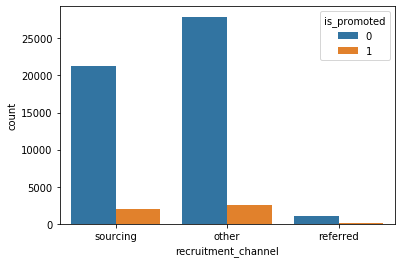

In [52]:
sb.countplot(df_train["recruitment_channel"] , hue = df_train["is_promoted"])

In [53]:
# since recruit has no relation in promotion -- drop
df_train.drop('recruitment_channel' , axis =1 , inplace =True)
df_test.drop('recruitment_channel' , axis =1 , inplace =True)

In [54]:
#no of train
df_train["no_of_trainings"]

0        1
1        1
2        1
3        2
4        1
        ..
54803    1
54804    1
54805    1
54806    1
54807    1
Name: no_of_trainings, Length: 54808, dtype: int64

In [55]:
print(df_train["no_of_trainings"].unique())
print(df_train["no_of_trainings"].nunique())

[ 1  2  3  4  7  5  6  8 10  9]
10


In [56]:
print(df_train["no_of_trainings"].value_counts())

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


In [57]:
df_train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,select_region
0,4,3.0,0,1,35,5.0,8,1,0,49,0,3
1,6,2.0,1,1,30,5.0,4,0,0,60,0,4
2,4,2.0,1,1,34,3.0,7,0,0,50,0,2
3,4,2.0,1,2,39,1.0,10,0,0,50,0,4
4,9,2.0,1,1,45,3.0,2,0,0,73,0,2


In [58]:
df_train["avg_training_score"].mean()

63.38675010947307

In [59]:
df_train["total_train_time"] = round(df_train["no_of_trainings"]*df_train["avg_training_score"]) // 60
df_test["total_train_time"] = round(df_test["no_of_trainings"]*df_test["avg_training_score"]) // 60

In [60]:
df_train.drop(["no_of_trainings"] ,axis =1 , inplace =True)
df_test.drop(["no_of_trainings"] ,axis =1 , inplace =True)

In [61]:
#age
df_train["age"]

0        35
1        30
2        34
3        39
4        45
         ..
54803    48
54804    37
54805    27
54806    29
54807    27
Name: age, Length: 54808, dtype: int64

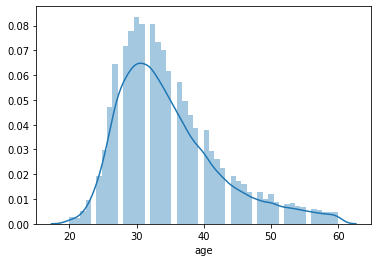

In [62]:
sb.distplot(df_train["age"])

In [63]:
df_train.groupby('age')["is_promoted"].mean().sort_values(ascending = False)

age
35    0.104390
33    0.099377
28    0.097871
38    0.095684
39    0.094985
34    0.092978
27    0.092324
30    0.088404
31    0.087719
51    0.087404
29    0.086344
37    0.084988
32    0.084041
24    0.082840
44    0.082645
36    0.082638
59    0.081340
41    0.080683
52    0.079772
56    0.079545
23    0.079439
42    0.079199
26    0.079126
48    0.078995
22    0.077922
43    0.077621
54    0.076677
40    0.076368
58    0.075117
49    0.074830
60    0.064516
45    0.063158
46    0.061693
55    0.061224
50    0.059501
25    0.053118
21    0.051020
47    0.048474
53    0.038462
20    0.035398
57    0.021008
Name: is_promoted, dtype: float64

In [64]:
#bins
print(df_train["age"].min() , df_train["age"].max())

20 60


In [65]:
df_train["age"].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21])

In [66]:
bins = [20,30,40,50,60]
labels = ['adult','middle_life','old','retire']
df_train["age_group"] = pd.cut(df_train["age"] , bins = bins , labels = labels)

In [67]:
bins = [20,30,40,50,60]
labels = ['adult','middle_life','old','retire']
df_test["age_group"] = pd.cut(df_test["age"] , bins = bins , labels = labels)

In [68]:
print(df_train["age_group"].isna().sum())
print(df_test["age_group"].isna().sum())

113
51


In [69]:
df_train["age_group"].fillna(df_train['age_group'].mode()[0] , inplace =True)
df_test["age_group"].fillna(df_test['age_group'].mode()[0] , inplace =True)

In [70]:
df_train

,department,education,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,select_region,total_train_time,age_group
0,4,3.0,0,35,5.0,8,1,0,49,0,3,0,middle_life
1,6,2.0,1,30,5.0,4,0,0,60,0,4,1,adult
2,4,2.0,1,34,3.0,7,0,0,50,0,2,0,middle_life
3,4,2.0,1,39,1.0,10,0,0,50,0,4,1,middle_life
4,9,2.0,1,45,3.0,2,0,0,73,0,2,1,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,9,2.0,1,48,3.0,17,0,0,78,0,2,1,old
54804,6,3.0,0,37,2.0,6,0,0,56,0,2,0,middle_life
54805,7,2.0,1,27,5.0,3,1,0,79,0,3,1,adult
54806,4,2.0,1,29,1.0,2,0,0,45,0,3,0,adult


In [71]:
df_train.groupby('age_group')["is_promoted"].mean().sort_values(ascending = False)

age_group
middle_life    0.090394
adult          0.085865
old            0.072727
retire         0.066971
Name: is_promoted, dtype: float64

In [72]:
df_train.loc[: , "age_group"] = df_train.loc[: , "age_group"].map({"middle_life":4,"adult":3,"old":2,"retire":1})
df_test.loc[: , "age_group"] = df_test.loc[: , "age_group"].map({"middle_life":4,"adult":3,"old":2,"retire":1})

In [73]:
df_train.drop(["age"],axis =1 , inplace =True)
df_test.drop(["age"],axis =1 , inplace =True)

In [74]:
#previous year rating
df_train["previous_year_rating"]

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [75]:
print(df_train["previous_year_rating"].unique())
print(df_test["previous_year_rating"].nunique())

[ 5.  3.  1.  4. nan  2.]
5


In [76]:
df_train.groupby('previous_year_rating')["is_promoted"].mean().sort_values(ascending =False)

previous_year_rating
5.0    0.163615
4.0    0.079376
3.0    0.072779
2.0    0.042840
1.0    0.014141
Name: is_promoted, dtype: float64

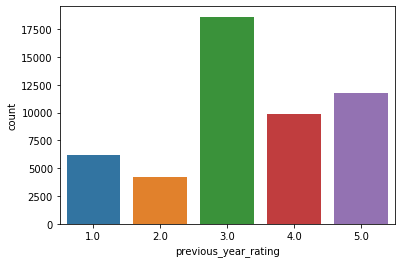

In [77]:
sb.countplot(df_train["previous_year_rating"])

In [78]:
df_train

,department,education,gender,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,select_region,total_train_time,age_group
0,4,3.0,0,5.0,8,1,0,49,0,3,0,4
1,6,2.0,1,5.0,4,0,0,60,0,4,1,3
2,4,2.0,1,3.0,7,0,0,50,0,2,0,4
3,4,2.0,1,1.0,10,0,0,50,0,4,1,4
4,9,2.0,1,3.0,2,0,0,73,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,9,2.0,1,3.0,17,0,0,78,0,2,1,2
54804,6,3.0,0,2.0,6,0,0,56,0,2,0,4
54805,7,2.0,1,5.0,3,1,0,79,0,3,1,3
54806,4,2.0,1,1.0,2,0,0,45,0,3,0,3


In [79]:
df_train["previous_year_rating"].isnull().sum()

4124

In [80]:
import math

for i ,row in df_train.iterrows():
    if math.isnan(row['previous_year_rating']):
        if df_train.loc[i , "awards_won?"] == 1:
            df_train.loc[i , "previous_year_rating"] = 5.0
        else:
            df_train.loc[i , "previous_year_rating"] = np.random.randint(1,5)
        
print("done")

for i ,row in df_test.iterrows():
    if math.isnan(row['previous_year_rating']):
        if df_test.loc[i , "awards_won?"] == 1:
            df_test.loc[i , "previous_year_rating"] = 5.0
        else:
            df_test.loc[i , "previous_year_rating"] = np.random.randint(1,5)
        
print("done")



done
done


In [81]:
df_train["previous_year_rating"].isnull().sum()

0

In [82]:
df_test["previous_year_rating"].isnull().sum()

0

In [83]:
#length of service
df_train["length_of_service"]

0         8
1         4
2         7
3        10
4         2
         ..
54803    17
54804     6
54805     3
54806     2
54807     5
Name: length_of_service, Length: 54808, dtype: int64

In [84]:
print(df_train["length_of_service"].unique())
print(df_train["length_of_service"].nunique())

[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
35


In [85]:
df_train.groupby('length_of_service')["is_promoted"].mean().sort_values(ascending =False)

length_of_service
34    0.250000
32    0.200000
23    0.107692
11    0.104803
29    0.100000
22    0.098361
19    0.097264
8     0.093306
10    0.093023
2     0.089019
4     0.087478
9     0.087105
3     0.086592
6     0.084706
7     0.083589
1     0.082912
5     0.081447
12    0.079345
13    0.078603
20    0.078125
16    0.074818
15    0.072513
28    0.066667
18    0.063776
17    0.060185
14    0.052823
21    0.051282
25    0.039216
27    0.027778
24    0.000000
26    0.000000
30    0.000000
31    0.000000
33    0.000000
37    0.000000
Name: is_promoted, dtype: float64

(array([2.510e+04, 1.900e+04, 5.738e+03, 2.623e+03, 1.372e+03, 5.960e+02,
        2.270e+02, 9.600e+01, 5.100e+01, 5.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

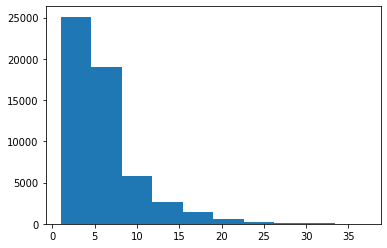

In [86]:
plt.hist(df_train["length_of_service"])

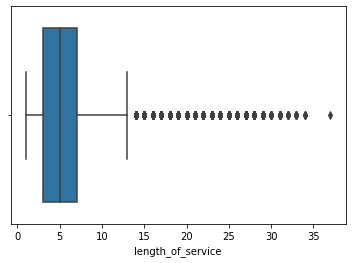

In [87]:
sb.boxplot(df_train["length_of_service"])

In [88]:
print(df_train["length_of_service"].value_counts())

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64


In [89]:
#bins
bins = [1,10,20,30,40]
labels = [1,2,3,4]
df_train["promotion_chance_based_on_service"] = pd.cut(df_train["length_of_service"] , bins= bins , labels = labels)

In [90]:
#bins
bins = [1,10,20,30,40]
labels = [1,2,3,4]
df_test["promotion_chance_based_on_service"] = pd.cut(df_test["length_of_service"] , bins= bins , labels = labels)

In [91]:
df_train

,department,education,gender,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,select_region,total_train_time,age_group,promotion_chance_based_on_service
0,4,3.0,0,5.0,8,1,0,49,0,3,0,4,1
1,6,2.0,1,5.0,4,0,0,60,0,4,1,3,1
2,4,2.0,1,3.0,7,0,0,50,0,2,0,4,1
3,4,2.0,1,1.0,10,0,0,50,0,4,1,4,1
4,9,2.0,1,3.0,2,0,0,73,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,9,2.0,1,3.0,17,0,0,78,0,2,1,2,2
54804,6,3.0,0,2.0,6,0,0,56,0,2,0,4,1
54805,7,2.0,1,5.0,3,1,0,79,0,3,1,3,1
54806,4,2.0,1,1.0,2,0,0,45,0,3,0,3,1


In [92]:
#kpi  
df_train["KPIs_met >80%"]

0        1
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    1
54806    0
54807    0
Name: KPIs_met >80%, Length: 54808, dtype: int64

In [93]:
print(df_train["KPIs_met >80%"].unique())
print(df_train["KPIs_met >80%"].nunique())
print(df_train["KPIs_met >80%"].value_counts())

[1 0]
2
0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


In [94]:
print(df_train["awards_won?"].unique())
print(df_train["awards_won?"].nunique())
print(df_train["awards_won?"].value_counts())

[0 1]
2
0    53538
1     1270
Name: awards_won?, dtype: int64


In [95]:
for i in range(len(df_train)):
    if(( df_train.loc[i , "awards_won?"] == 1) and (df_train.loc[i , "KPIs_met >80%"] == 1)):
        df_train.loc[i , 'promotion_prize'] = 1
    else:
        df_train.loc[i , "promotion_prize"] = 0
print("done")

done


In [96]:
for i in range(len(df_test)):
    if(( df_test.loc[i , "awards_won?"] == 1) and (df_test.loc[i , "KPIs_met >80%"] == 1)):
        df_test.loc[i , 'promotion_prize'] = 1
    else:
        df_test.loc[i , "promotion_prize"] = 0
print("done")

done


In [97]:
#avg train score
df_train["avg_training_score"]

0        49
1        60
2        50
3        50
4        73
         ..
54803    78
54804    56
54805    79
54806    45
54807    49
Name: avg_training_score, Length: 54808, dtype: int64

In [98]:
df_train.groupby('avg_training_score')["is_promoted"].mean().sort_values(ascending =False)

avg_training_score
99    1.000000
98    1.000000
97    1.000000
95    1.000000
96    0.979167
        ...   
42    0.032258
46    0.031690
44    0.029851
40    0.000000
39    0.000000
Name: is_promoted, Length: 61, dtype: float64

In [99]:
#bins
bins = [39,59,79,99]
labels = [1,2,3]
df_train["promote_train_score"] = pd.cut(df_train["avg_training_score"] , bins = bins , labels = labels)
df_test["promote_train_score"] = pd.cut(df_test["avg_training_score"] , bins = bins , labels = labels)

In [100]:
print(df_train["promote_train_score"].value_counts())

1    25866
2    18416
3    10524
Name: promote_train_score, dtype: int64


/Users/rk/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rk/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([25866.,     0.,     0.,     0.,     0., 18416.,     0.,     0.,
            0., 10524.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

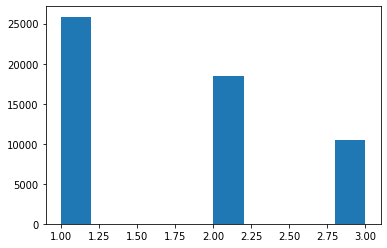

In [101]:
plt.hist(df_train["promote_train_score"])

In [102]:
df_train.groupby('promote_train_score')["is_promoted"].mean()

promote_train_score
1    0.046973
2    0.093614
3    0.164291
Name: is_promoted, dtype: float64

In [103]:
df_train.isna().sum()

department                              0
education                               0
gender                                  0
previous_year_rating                    0
length_of_service                       0
KPIs_met >80%                           0
awards_won?                             0
avg_training_score                      0
is_promoted                             0
select_region                           0
total_train_time                        0
age_group                               0
promotion_chance_based_on_service    4547
promotion_prize                         0
promote_train_score                     2
dtype: int64

In [104]:
df_train["promotion_chance_based_on_service"].fillna(df_train["promotion_chance_based_on_service"].mode()[0] , inplace = True)
df_test["promote_train_score"].fillna(df_test["promote_train_score"].mode()[0] , inplace = True)

In [105]:
df_train.groupby('select_region')["is_promoted"].mean().sort_values(ascending = False)

select_region
4    0.120779
3    0.081838
2    0.069841
1    0.051860
Name: is_promoted, dtype: float64

In [106]:
df_train.groupby('age_group')["is_promoted"].mean().sort_values(ascending = False)

age_group
4    0.090394
3    0.085865
2    0.072727
1    0.066971
Name: is_promoted, dtype: float64

In [107]:
df_train.groupby('promotion_chance_based_on_service')["is_promoted"].mean().sort_values(ascending = False)

promotion_chance_based_on_service
1    0.086280
2    0.078055
4    0.068182
3    0.052743
Name: is_promoted, dtype: float64

In [108]:
df_train.groupby('promote_train_score')["is_promoted"].mean().sort_values(ascending = False)

promote_train_score
3    0.164291
2    0.093614
1    0.046973
Name: is_promoted, dtype: float64

In [109]:
df_train["promotion_chance_based_on_service"].fillna(df_train["promotion_chance_based_on_service"].mode()[0] , inplace = True)
df_train["promote_train_score"].fillna(df_train["promote_train_score"].mode()[0] , inplace = True)

In [110]:
df_train["age_group"] = df_train["age_group"].astype("int")
df_train["promote_train_score"] = df_train["promote_train_score"].astype("int")
df_train["promotion_chance_based_on_service"] = df_train["promotion_chance_based_on_service"].astype("int")
df_train["select_region"] = df_train["select_region"].astype("int")

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   department                         54808 non-null  int64  
 1   education                          54808 non-null  float64
 2   gender                             54808 non-null  int64  
 3   previous_year_rating               54808 non-null  float64
 4   length_of_service                  54808 non-null  int64  
 5   KPIs_met >80%                      54808 non-null  int64  
 6   awards_won?                        54808 non-null  int64  
 7   avg_training_score                 54808 non-null  int64  
 8   is_promoted                        54808 non-null  int64  
 9   select_region                      54808 non-null  int64  
 10  total_train_time                   54808 non-null  int64  
 11  age_group                          54808 non-null  int

In [112]:
df_test["promotion_chance_based_on_service"].fillna(df_test["promotion_chance_based_on_service"].mode()[0] , inplace = True)
df_test["promote_train_score"].fillna(df_test["promote_train_score"].mode()[0] , inplace = True)

In [113]:
df_test["age_group"] = df_test["age_group"].astype("int")
df_test["promote_train_score"] = df_test["promote_train_score"].astype("int")
df_test["promotion_chance_based_on_service"] = df_test["promotion_chance_based_on_service"].astype("int")
df_test["select_region"] = df_test["select_region"].astype("int")

In [114]:
df_train.isna().sum()

department                           0
education                            0
gender                               0
previous_year_rating                 0
length_of_service                    0
KPIs_met >80%                        0
awards_won?                          0
avg_training_score                   0
is_promoted                          0
select_region                        0
total_train_time                     0
age_group                            0
promotion_chance_based_on_service    0
promotion_prize                      0
promote_train_score                  0
dtype: int64

In [115]:
df_test.isna().sum()

department                           0
education                            0
gender                               0
previous_year_rating                 0
length_of_service                    0
KPIs_met >80%                        0
awards_won?                          0
avg_training_score                   0
select_region                        0
total_train_time                     0
age_group                            0
promotion_chance_based_on_service    0
promotion_prize                      0
promote_train_score                  0
dtype: int64

In [116]:
df_train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [117]:
# use up sampling
x = df_train.drop(["is_promoted"] , axis = 1)
y = df_train["is_promoted"]
r = RandomOverSampler(sampling_strategy=0.7)
print(x.shape , y.shape)
x_new , y_new = r.fit_resample(x,y)
print(x_new.shape , y_new.shape)

(54808, 14) (54808,)
(85238, 14) (85238,)


In [118]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y_new , test_size = 0.2 , random_state = 100)

In [125]:
lr = LogisticRegression(max_iter = 5000)
dt =DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
extra = ExtraTreesClassifier()
#lgbm = lgbm.LGBMClassifier()
cat = CatBoostClassifier()

In [128]:
print(lr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))
print(rf.fit(x_train , y_train))
print(ada.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(extra.fit(x_train , y_train))
#print(lgbm.fit(x_train , y_train))
print(cat.fit(x_train , y_train))

LogisticRegression(max_iter=5000)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
XGBClassifier()
ExtraTreesClassifier()
Learning rate set to 0.062508
0:	learn: 0.6585683	total: 24.1ms	remaining: 24.1s
1:	learn: 0.6222773	total: 45.6ms	remaining: 22.8s
2:	learn: 0.5887283	total: 67.1ms	remaining: 22.3s
3:	learn: 0.5660943	total: 89ms	remaining: 22.2s
4:	learn: 0.5386704	total: 110ms	remaining: 21.9s
5:	learn: 0.5226026	total: 131ms	remaining: 21.7s
6:	learn: 0.5093652	total: 153ms	remaining: 21.6s
7:	learn: 0.4965008	total: 178ms	remaining: 22.1s
8:	learn: 0.4877701	total: 219ms	remaining: 24.2s
9:	learn: 0.4764070	total: 244ms	remaining: 24.1s
10:	learn: 0.4652663	total: 266ms	remaining: 23.9s
11:	learn: 0.4604422	total: 288ms	remaining: 23.7s
12:	learn: 0.4510271	total: 309ms	remaining: 23.5s
13:	learn: 0.4471191	total: 331ms	remaining: 23.3s
14:	learn: 0.4441099	total: 352ms	remaining: 23.1s
15:	learn: 0.4401713	total: 373ms	remaining: 22.9s
16:	learn: 0.43172

162:	learn: 0.3300474	total: 4.25s	remaining: 21.8s
163:	learn: 0.3299051	total: 4.29s	remaining: 21.8s
164:	learn: 0.3298027	total: 4.31s	remaining: 21.8s
165:	learn: 0.3297259	total: 4.33s	remaining: 21.8s
166:	learn: 0.3295765	total: 4.35s	remaining: 21.7s
167:	learn: 0.3294785	total: 4.38s	remaining: 21.7s
168:	learn: 0.3286537	total: 4.4s	remaining: 21.6s
169:	learn: 0.3282784	total: 4.42s	remaining: 21.6s
170:	learn: 0.3281222	total: 4.45s	remaining: 21.6s
171:	learn: 0.3279549	total: 4.48s	remaining: 21.6s
172:	learn: 0.3277794	total: 4.51s	remaining: 21.5s
173:	learn: 0.3276163	total: 4.53s	remaining: 21.5s
174:	learn: 0.3275466	total: 4.55s	remaining: 21.4s
175:	learn: 0.3273459	total: 4.57s	remaining: 21.4s
176:	learn: 0.3272321	total: 4.59s	remaining: 21.4s
177:	learn: 0.3270636	total: 4.62s	remaining: 21.3s
178:	learn: 0.3268287	total: 4.65s	remaining: 21.3s
179:	learn: 0.3267272	total: 4.67s	remaining: 21.3s
180:	learn: 0.3266468	total: 4.71s	remaining: 21.3s
181:	learn: 0

324:	learn: 0.3086796	total: 8.16s	remaining: 17s
325:	learn: 0.3084825	total: 8.19s	remaining: 16.9s
326:	learn: 0.3084298	total: 8.21s	remaining: 16.9s
327:	learn: 0.3083224	total: 8.23s	remaining: 16.9s
328:	learn: 0.3082025	total: 8.25s	remaining: 16.8s
329:	learn: 0.3080897	total: 8.27s	remaining: 16.8s
330:	learn: 0.3079488	total: 8.55s	remaining: 17.3s
331:	learn: 0.3078422	total: 8.64s	remaining: 17.4s
332:	learn: 0.3077522	total: 8.68s	remaining: 17.4s
333:	learn: 0.3076633	total: 8.71s	remaining: 17.4s
334:	learn: 0.3075813	total: 8.74s	remaining: 17.4s
335:	learn: 0.3074393	total: 8.78s	remaining: 17.4s
336:	learn: 0.3073563	total: 8.83s	remaining: 17.4s
337:	learn: 0.3072774	total: 8.87s	remaining: 17.4s
338:	learn: 0.3071749	total: 8.91s	remaining: 17.4s
339:	learn: 0.3070508	total: 8.94s	remaining: 17.4s
340:	learn: 0.3069418	total: 8.96s	remaining: 17.3s
341:	learn: 0.3068130	total: 8.99s	remaining: 17.3s
342:	learn: 0.3067501	total: 9.02s	remaining: 17.3s
343:	learn: 0.

484:	learn: 0.2945361	total: 13.2s	remaining: 14s
485:	learn: 0.2944561	total: 13.2s	remaining: 14s
486:	learn: 0.2943999	total: 13.2s	remaining: 13.9s
487:	learn: 0.2943196	total: 13.3s	remaining: 13.9s
488:	learn: 0.2942556	total: 13.3s	remaining: 13.9s
489:	learn: 0.2942157	total: 13.3s	remaining: 13.9s
490:	learn: 0.2941436	total: 13.3s	remaining: 13.8s
491:	learn: 0.2940604	total: 13.4s	remaining: 13.8s
492:	learn: 0.2939979	total: 13.4s	remaining: 13.8s
493:	learn: 0.2939046	total: 13.4s	remaining: 13.7s
494:	learn: 0.2937996	total: 13.4s	remaining: 13.7s
495:	learn: 0.2937330	total: 13.5s	remaining: 13.7s
496:	learn: 0.2937024	total: 13.5s	remaining: 13.6s
497:	learn: 0.2936052	total: 13.5s	remaining: 13.6s
498:	learn: 0.2935356	total: 13.5s	remaining: 13.6s
499:	learn: 0.2934805	total: 13.5s	remaining: 13.5s
500:	learn: 0.2934128	total: 13.6s	remaining: 13.5s
501:	learn: 0.2933273	total: 13.6s	remaining: 13.5s
502:	learn: 0.2932988	total: 13.6s	remaining: 13.5s
503:	learn: 0.29

645:	learn: 0.2837443	total: 18.2s	remaining: 9.97s
646:	learn: 0.2836749	total: 18.2s	remaining: 9.94s
647:	learn: 0.2835999	total: 18.2s	remaining: 9.91s
648:	learn: 0.2835266	total: 18.3s	remaining: 9.88s
649:	learn: 0.2834788	total: 18.3s	remaining: 9.85s
650:	learn: 0.2834192	total: 18.3s	remaining: 9.81s
651:	learn: 0.2833534	total: 18.3s	remaining: 9.78s
652:	learn: 0.2833235	total: 18.4s	remaining: 9.75s
653:	learn: 0.2832968	total: 18.4s	remaining: 9.72s
654:	learn: 0.2832403	total: 18.4s	remaining: 9.69s
655:	learn: 0.2831890	total: 18.4s	remaining: 9.67s
656:	learn: 0.2831496	total: 18.5s	remaining: 9.64s
657:	learn: 0.2831047	total: 18.5s	remaining: 9.62s
658:	learn: 0.2830069	total: 18.5s	remaining: 9.59s
659:	learn: 0.2829096	total: 18.6s	remaining: 9.56s
660:	learn: 0.2828420	total: 18.6s	remaining: 9.53s
661:	learn: 0.2827491	total: 18.6s	remaining: 9.51s
662:	learn: 0.2827291	total: 18.7s	remaining: 9.48s
663:	learn: 0.2826736	total: 18.7s	remaining: 9.45s
664:	learn: 

809:	learn: 0.2739339	total: 23s	remaining: 5.4s
810:	learn: 0.2738918	total: 23s	remaining: 5.37s
811:	learn: 0.2738329	total: 23.1s	remaining: 5.34s
812:	learn: 0.2737504	total: 23.2s	remaining: 5.34s
813:	learn: 0.2736907	total: 23.3s	remaining: 5.33s
814:	learn: 0.2736350	total: 23.4s	remaining: 5.32s
815:	learn: 0.2735925	total: 23.5s	remaining: 5.29s
816:	learn: 0.2735187	total: 23.6s	remaining: 5.28s
817:	learn: 0.2734490	total: 23.6s	remaining: 5.26s
818:	learn: 0.2734047	total: 23.7s	remaining: 5.24s
819:	learn: 0.2733581	total: 23.8s	remaining: 5.22s
820:	learn: 0.2732589	total: 23.8s	remaining: 5.2s
821:	learn: 0.2732017	total: 23.9s	remaining: 5.17s
822:	learn: 0.2731642	total: 23.9s	remaining: 5.14s
823:	learn: 0.2730883	total: 23.9s	remaining: 5.11s
824:	learn: 0.2730368	total: 23.9s	remaining: 5.08s
825:	learn: 0.2729719	total: 24s	remaining: 5.05s
826:	learn: 0.2729483	total: 24s	remaining: 5.02s
827:	learn: 0.2728980	total: 24s	remaining: 4.99s
828:	learn: 0.2728074	to

969:	learn: 0.2652974	total: 27.9s	remaining: 864ms
970:	learn: 0.2652395	total: 28s	remaining: 835ms
971:	learn: 0.2651686	total: 28s	remaining: 806ms
972:	learn: 0.2650957	total: 28s	remaining: 777ms
973:	learn: 0.2650459	total: 28s	remaining: 748ms
974:	learn: 0.2649761	total: 28.1s	remaining: 719ms
975:	learn: 0.2649264	total: 28.1s	remaining: 690ms
976:	learn: 0.2648848	total: 28.1s	remaining: 661ms
977:	learn: 0.2648437	total: 28.1s	remaining: 633ms
978:	learn: 0.2647839	total: 28.1s	remaining: 604ms
979:	learn: 0.2647470	total: 28.2s	remaining: 575ms
980:	learn: 0.2646839	total: 28.2s	remaining: 546ms
981:	learn: 0.2646698	total: 28.2s	remaining: 517ms
982:	learn: 0.2646257	total: 28.3s	remaining: 489ms
983:	learn: 0.2645627	total: 28.3s	remaining: 460ms
984:	learn: 0.2645173	total: 28.3s	remaining: 431ms
985:	learn: 0.2644576	total: 28.3s	remaining: 402ms
986:	learn: 0.2643900	total: 28.3s	remaining: 373ms
987:	learn: 0.2643497	total: 28.4s	remaining: 345ms
988:	learn: 0.264316

In [126]:
print(cross_val_score(lr , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(dt , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(rf , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(ada , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(xgb , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(extra , x_new,y_new , cv = 5 ,scoring = "f1").mean())
print(cross_val_score(cat , x_new,y_new , cv = 5 ,scoring = "f1").mean())

0.6352376397958479
0.9489403351007167
0.9626871112697166
0.6837942363294416
0.7736455485234229
0.9697759383729476
Learning rate set to 0.062508
0:	learn: 0.6571290	total: 24.9ms	remaining: 24.9s
1:	learn: 0.6207172	total: 46.1ms	remaining: 23s
2:	learn: 0.5874407	total: 67.3ms	remaining: 22.4s
3:	learn: 0.5651164	total: 89.3ms	remaining: 22.2s
4:	learn: 0.5397578	total: 110ms	remaining: 21.9s
5:	learn: 0.5232666	total: 132ms	remaining: 21.9s
6:	learn: 0.5093176	total: 161ms	remaining: 22.9s
7:	learn: 0.4961423	total: 200ms	remaining: 24.7s
8:	learn: 0.4879462	total: 223ms	remaining: 24.6s
9:	learn: 0.4808156	total: 245ms	remaining: 24.2s
10:	learn: 0.4669478	total: 267ms	remaining: 24s
11:	learn: 0.4591713	total: 288ms	remaining: 23.7s
12:	learn: 0.4505327	total: 310ms	remaining: 23.5s
13:	learn: 0.4475392	total: 332ms	remaining: 23.4s
14:	learn: 0.4356794	total: 354ms	remaining: 23.2s
15:	learn: 0.4328108	total: 390ms	remaining: 24s
16:	learn: 0.4277558	total: 417ms	remaining: 24.1s
1

166:	learn: 0.3286323	total: 4.14s	remaining: 20.6s
167:	learn: 0.3285437	total: 4.16s	remaining: 20.6s
168:	learn: 0.3283335	total: 4.18s	remaining: 20.6s
169:	learn: 0.3282506	total: 4.21s	remaining: 20.5s
170:	learn: 0.3281247	total: 4.23s	remaining: 20.5s
171:	learn: 0.3279410	total: 4.25s	remaining: 20.5s
172:	learn: 0.3277684	total: 4.27s	remaining: 20.4s
173:	learn: 0.3273946	total: 4.3s	remaining: 20.4s
174:	learn: 0.3273390	total: 4.33s	remaining: 20.4s
175:	learn: 0.3271504	total: 4.36s	remaining: 20.4s
176:	learn: 0.3270486	total: 4.38s	remaining: 20.4s
177:	learn: 0.3269232	total: 4.41s	remaining: 20.4s
178:	learn: 0.3268235	total: 4.43s	remaining: 20.3s
179:	learn: 0.3267550	total: 4.45s	remaining: 20.3s
180:	learn: 0.3266078	total: 4.47s	remaining: 20.2s
181:	learn: 0.3265249	total: 4.49s	remaining: 20.2s
182:	learn: 0.3264340	total: 4.51s	remaining: 20.2s
183:	learn: 0.3262903	total: 4.54s	remaining: 20.1s
184:	learn: 0.3261500	total: 4.56s	remaining: 20.1s
185:	learn: 0

328:	learn: 0.3073916	total: 9.03s	remaining: 18.4s
329:	learn: 0.3072835	total: 9.05s	remaining: 18.4s
330:	learn: 0.3070765	total: 9.08s	remaining: 18.4s
331:	learn: 0.3069380	total: 9.1s	remaining: 18.3s
332:	learn: 0.3068367	total: 9.13s	remaining: 18.3s
333:	learn: 0.3067297	total: 9.15s	remaining: 18.2s
334:	learn: 0.3066298	total: 9.17s	remaining: 18.2s
335:	learn: 0.3065013	total: 9.19s	remaining: 18.2s
336:	learn: 0.3063469	total: 9.22s	remaining: 18.1s
337:	learn: 0.3062224	total: 9.24s	remaining: 18.1s
338:	learn: 0.3061136	total: 9.27s	remaining: 18.1s
339:	learn: 0.3060387	total: 9.29s	remaining: 18s
340:	learn: 0.3059139	total: 9.31s	remaining: 18s
341:	learn: 0.3058471	total: 9.34s	remaining: 18s
342:	learn: 0.3057428	total: 9.36s	remaining: 17.9s
343:	learn: 0.3056879	total: 9.38s	remaining: 17.9s
344:	learn: 0.3055862	total: 9.4s	remaining: 17.9s
345:	learn: 0.3054704	total: 9.43s	remaining: 17.8s
346:	learn: 0.3054435	total: 9.46s	remaining: 17.8s
347:	learn: 0.305341

491:	learn: 0.2933084	total: 13.2s	remaining: 13.6s
492:	learn: 0.2932041	total: 13.2s	remaining: 13.6s
493:	learn: 0.2931562	total: 13.2s	remaining: 13.5s
494:	learn: 0.2930889	total: 13.2s	remaining: 13.5s
495:	learn: 0.2930311	total: 13.3s	remaining: 13.5s
496:	learn: 0.2929423	total: 13.3s	remaining: 13.4s
497:	learn: 0.2929142	total: 13.3s	remaining: 13.4s
498:	learn: 0.2928321	total: 13.3s	remaining: 13.4s
499:	learn: 0.2927740	total: 13.4s	remaining: 13.4s
500:	learn: 0.2927037	total: 13.4s	remaining: 13.3s
501:	learn: 0.2926629	total: 13.4s	remaining: 13.3s
502:	learn: 0.2926377	total: 13.4s	remaining: 13.3s
503:	learn: 0.2925692	total: 13.5s	remaining: 13.2s
504:	learn: 0.2924734	total: 13.5s	remaining: 13.2s
505:	learn: 0.2924028	total: 13.5s	remaining: 13.2s
506:	learn: 0.2923414	total: 13.5s	remaining: 13.1s
507:	learn: 0.2922863	total: 13.5s	remaining: 13.1s
508:	learn: 0.2922229	total: 13.6s	remaining: 13.1s
509:	learn: 0.2921914	total: 13.6s	remaining: 13.1s
510:	learn: 

655:	learn: 0.2834063	total: 17.5s	remaining: 9.17s
656:	learn: 0.2832985	total: 17.5s	remaining: 9.14s
657:	learn: 0.2832525	total: 17.5s	remaining: 9.11s
658:	learn: 0.2831940	total: 17.6s	remaining: 9.08s
659:	learn: 0.2831414	total: 17.6s	remaining: 9.05s
660:	learn: 0.2830609	total: 17.6s	remaining: 9.02s
661:	learn: 0.2830206	total: 17.6s	remaining: 8.99s
662:	learn: 0.2829578	total: 17.6s	remaining: 8.97s
663:	learn: 0.2829137	total: 17.7s	remaining: 8.94s
664:	learn: 0.2828235	total: 17.7s	remaining: 8.91s
665:	learn: 0.2827830	total: 17.7s	remaining: 8.89s
666:	learn: 0.2827600	total: 17.7s	remaining: 8.86s
667:	learn: 0.2827195	total: 17.8s	remaining: 8.83s
668:	learn: 0.2826679	total: 17.8s	remaining: 8.8s
669:	learn: 0.2825746	total: 17.8s	remaining: 8.77s
670:	learn: 0.2825350	total: 17.8s	remaining: 8.74s
671:	learn: 0.2824897	total: 17.9s	remaining: 8.72s
672:	learn: 0.2824416	total: 17.9s	remaining: 8.69s
673:	learn: 0.2823920	total: 17.9s	remaining: 8.66s
674:	learn: 0

817:	learn: 0.2745276	total: 21.4s	remaining: 4.76s
818:	learn: 0.2744543	total: 21.4s	remaining: 4.74s
819:	learn: 0.2743280	total: 21.5s	remaining: 4.71s
820:	learn: 0.2742881	total: 21.5s	remaining: 4.68s
821:	learn: 0.2742519	total: 21.5s	remaining: 4.66s
822:	learn: 0.2742330	total: 21.5s	remaining: 4.63s
823:	learn: 0.2741725	total: 21.5s	remaining: 4.6s
824:	learn: 0.2741551	total: 21.6s	remaining: 4.57s
825:	learn: 0.2740936	total: 21.6s	remaining: 4.55s
826:	learn: 0.2740433	total: 21.6s	remaining: 4.52s
827:	learn: 0.2739918	total: 21.6s	remaining: 4.5s
828:	learn: 0.2739237	total: 21.7s	remaining: 4.47s
829:	learn: 0.2739042	total: 21.7s	remaining: 4.44s
830:	learn: 0.2738507	total: 21.7s	remaining: 4.42s
831:	learn: 0.2737944	total: 21.7s	remaining: 4.39s
832:	learn: 0.2737491	total: 21.8s	remaining: 4.36s
833:	learn: 0.2736522	total: 21.8s	remaining: 4.33s
834:	learn: 0.2736216	total: 21.8s	remaining: 4.31s
835:	learn: 0.2735910	total: 21.8s	remaining: 4.28s
836:	learn: 0.

976:	learn: 0.2667247	total: 25.2s	remaining: 593ms
977:	learn: 0.2666718	total: 25.2s	remaining: 567ms
978:	learn: 0.2666542	total: 25.2s	remaining: 541ms
979:	learn: 0.2666096	total: 25.2s	remaining: 515ms
980:	learn: 0.2665445	total: 25.3s	remaining: 489ms
981:	learn: 0.2665133	total: 25.3s	remaining: 464ms
982:	learn: 0.2664843	total: 25.3s	remaining: 438ms
983:	learn: 0.2664405	total: 25.3s	remaining: 412ms
984:	learn: 0.2663953	total: 25.4s	remaining: 386ms
985:	learn: 0.2663338	total: 25.4s	remaining: 360ms
986:	learn: 0.2663059	total: 25.4s	remaining: 335ms
987:	learn: 0.2662736	total: 25.4s	remaining: 309ms
988:	learn: 0.2662342	total: 25.5s	remaining: 283ms
989:	learn: 0.2661561	total: 25.5s	remaining: 257ms
990:	learn: 0.2661412	total: 25.5s	remaining: 232ms
991:	learn: 0.2660835	total: 25.5s	remaining: 206ms
992:	learn: 0.2660096	total: 25.5s	remaining: 180ms
993:	learn: 0.2659723	total: 25.6s	remaining: 154ms
994:	learn: 0.2659564	total: 25.6s	remaining: 129ms
995:	learn: 

144:	learn: 0.3322432	total: 3.39s	remaining: 20s
145:	learn: 0.3319326	total: 3.42s	remaining: 20s
146:	learn: 0.3315243	total: 3.44s	remaining: 20s
147:	learn: 0.3314328	total: 3.47s	remaining: 20s
148:	learn: 0.3313416	total: 3.49s	remaining: 19.9s
149:	learn: 0.3311464	total: 3.51s	remaining: 19.9s
150:	learn: 0.3307527	total: 3.53s	remaining: 19.9s
151:	learn: 0.3305847	total: 3.56s	remaining: 19.8s
152:	learn: 0.3303001	total: 3.58s	remaining: 19.8s
153:	learn: 0.3301186	total: 3.61s	remaining: 19.9s
154:	learn: 0.3300149	total: 3.64s	remaining: 19.8s
155:	learn: 0.3299053	total: 3.66s	remaining: 19.8s
156:	learn: 0.3297814	total: 3.68s	remaining: 19.8s
157:	learn: 0.3296657	total: 3.71s	remaining: 19.7s
158:	learn: 0.3294493	total: 3.73s	remaining: 19.7s
159:	learn: 0.3293557	total: 3.75s	remaining: 19.7s
160:	learn: 0.3292910	total: 3.77s	remaining: 19.7s
161:	learn: 0.3290945	total: 3.79s	remaining: 19.6s
162:	learn: 0.3288940	total: 3.82s	remaining: 19.6s
163:	learn: 0.328789

307:	learn: 0.3100966	total: 7.53s	remaining: 16.9s
308:	learn: 0.3099666	total: 7.56s	remaining: 16.9s
309:	learn: 0.3098110	total: 7.58s	remaining: 16.9s
310:	learn: 0.3096662	total: 7.6s	remaining: 16.8s
311:	learn: 0.3096088	total: 7.62s	remaining: 16.8s
312:	learn: 0.3095105	total: 7.64s	remaining: 16.8s
313:	learn: 0.3094186	total: 7.67s	remaining: 16.8s
314:	learn: 0.3093575	total: 7.69s	remaining: 16.7s
315:	learn: 0.3092953	total: 7.71s	remaining: 16.7s
316:	learn: 0.3091942	total: 7.73s	remaining: 16.7s
317:	learn: 0.3090720	total: 7.76s	remaining: 16.7s
318:	learn: 0.3089984	total: 7.79s	remaining: 16.6s
319:	learn: 0.3088298	total: 7.81s	remaining: 16.6s
320:	learn: 0.3087285	total: 7.83s	remaining: 16.6s
321:	learn: 0.3086664	total: 7.85s	remaining: 16.5s
322:	learn: 0.3085665	total: 7.87s	remaining: 16.5s
323:	learn: 0.3084727	total: 7.9s	remaining: 16.5s
324:	learn: 0.3081804	total: 7.92s	remaining: 16.4s
325:	learn: 0.3080343	total: 7.94s	remaining: 16.4s
326:	learn: 0.

467:	learn: 0.2957850	total: 11.4s	remaining: 12.9s
468:	learn: 0.2957306	total: 11.4s	remaining: 12.9s
469:	learn: 0.2956337	total: 11.4s	remaining: 12.8s
470:	learn: 0.2955323	total: 11.4s	remaining: 12.8s
471:	learn: 0.2954564	total: 11.4s	remaining: 12.8s
472:	learn: 0.2953736	total: 11.5s	remaining: 12.8s
473:	learn: 0.2952953	total: 11.5s	remaining: 12.7s
474:	learn: 0.2952122	total: 11.5s	remaining: 12.7s
475:	learn: 0.2951303	total: 11.5s	remaining: 12.7s
476:	learn: 0.2950430	total: 11.5s	remaining: 12.7s
477:	learn: 0.2949726	total: 11.6s	remaining: 12.6s
478:	learn: 0.2948674	total: 11.6s	remaining: 12.6s
479:	learn: 0.2948000	total: 11.6s	remaining: 12.6s
480:	learn: 0.2947374	total: 11.6s	remaining: 12.6s
481:	learn: 0.2946668	total: 11.7s	remaining: 12.5s
482:	learn: 0.2945891	total: 11.7s	remaining: 12.5s
483:	learn: 0.2945074	total: 11.7s	remaining: 12.5s
484:	learn: 0.2944297	total: 11.7s	remaining: 12.5s
485:	learn: 0.2943530	total: 11.8s	remaining: 12.4s
486:	learn: 

626:	learn: 0.2843776	total: 15.1s	remaining: 8.99s
627:	learn: 0.2843172	total: 15.1s	remaining: 8.97s
628:	learn: 0.2842658	total: 15.2s	remaining: 8.94s
629:	learn: 0.2841998	total: 15.2s	remaining: 8.92s
630:	learn: 0.2841165	total: 15.2s	remaining: 8.89s
631:	learn: 0.2840729	total: 15.2s	remaining: 8.87s
632:	learn: 0.2839790	total: 15.2s	remaining: 8.84s
633:	learn: 0.2839298	total: 15.3s	remaining: 8.81s
634:	learn: 0.2839035	total: 15.3s	remaining: 8.79s
635:	learn: 0.2838637	total: 15.3s	remaining: 8.77s
636:	learn: 0.2838110	total: 15.3s	remaining: 8.75s
637:	learn: 0.2837778	total: 15.4s	remaining: 8.72s
638:	learn: 0.2837287	total: 15.4s	remaining: 8.7s
639:	learn: 0.2836361	total: 15.4s	remaining: 8.67s
640:	learn: 0.2835616	total: 15.4s	remaining: 8.65s
641:	learn: 0.2834917	total: 15.5s	remaining: 8.62s
642:	learn: 0.2834066	total: 15.5s	remaining: 8.6s
643:	learn: 0.2833109	total: 15.5s	remaining: 8.57s
644:	learn: 0.2832526	total: 15.5s	remaining: 8.55s
645:	learn: 0.

785:	learn: 0.2755096	total: 20.6s	remaining: 5.61s
786:	learn: 0.2754570	total: 20.6s	remaining: 5.58s
787:	learn: 0.2754097	total: 20.7s	remaining: 5.56s
788:	learn: 0.2753785	total: 20.7s	remaining: 5.53s
789:	learn: 0.2753287	total: 20.7s	remaining: 5.51s
790:	learn: 0.2752337	total: 20.7s	remaining: 5.48s
791:	learn: 0.2751984	total: 20.8s	remaining: 5.46s
792:	learn: 0.2751332	total: 20.8s	remaining: 5.43s
793:	learn: 0.2750637	total: 20.9s	remaining: 5.41s
794:	learn: 0.2750176	total: 20.9s	remaining: 5.39s
795:	learn: 0.2749268	total: 20.9s	remaining: 5.37s
796:	learn: 0.2748440	total: 21s	remaining: 5.34s
797:	learn: 0.2747567	total: 21s	remaining: 5.32s
798:	learn: 0.2747133	total: 21s	remaining: 5.29s
799:	learn: 0.2746586	total: 21.1s	remaining: 5.27s
800:	learn: 0.2746251	total: 21.1s	remaining: 5.24s
801:	learn: 0.2746116	total: 21.1s	remaining: 5.22s
802:	learn: 0.2745876	total: 21.2s	remaining: 5.2s
803:	learn: 0.2745297	total: 21.2s	remaining: 5.17s
804:	learn: 0.27449

948:	learn: 0.2671132	total: 26s	remaining: 1.4s
949:	learn: 0.2670818	total: 26.1s	remaining: 1.37s
950:	learn: 0.2670319	total: 26.1s	remaining: 1.34s
951:	learn: 0.2670049	total: 26.1s	remaining: 1.32s
952:	learn: 0.2669769	total: 26.2s	remaining: 1.29s
953:	learn: 0.2669363	total: 26.3s	remaining: 1.27s
954:	learn: 0.2668970	total: 26.3s	remaining: 1.24s
955:	learn: 0.2668369	total: 26.4s	remaining: 1.21s
956:	learn: 0.2667672	total: 26.4s	remaining: 1.19s
957:	learn: 0.2666926	total: 26.5s	remaining: 1.16s
958:	learn: 0.2665922	total: 26.5s	remaining: 1.13s
959:	learn: 0.2665594	total: 26.6s	remaining: 1.11s
960:	learn: 0.2664963	total: 26.6s	remaining: 1.08s
961:	learn: 0.2664592	total: 26.6s	remaining: 1.05s
962:	learn: 0.2664378	total: 26.6s	remaining: 1.02s
963:	learn: 0.2663751	total: 26.7s	remaining: 996ms
964:	learn: 0.2663193	total: 26.7s	remaining: 968ms
965:	learn: 0.2662594	total: 26.7s	remaining: 940ms
966:	learn: 0.2662286	total: 26.7s	remaining: 912ms
967:	learn: 0.2

110:	learn: 0.3398128	total: 4.32s	remaining: 34.6s
111:	learn: 0.3396528	total: 4.36s	remaining: 34.6s
112:	learn: 0.3394435	total: 4.39s	remaining: 34.5s
113:	learn: 0.3387704	total: 4.41s	remaining: 34.3s
114:	learn: 0.3383930	total: 4.43s	remaining: 34.1s
115:	learn: 0.3381608	total: 4.46s	remaining: 34s
116:	learn: 0.3379782	total: 4.48s	remaining: 33.8s
117:	learn: 0.3377501	total: 4.5s	remaining: 33.7s
118:	learn: 0.3375711	total: 4.53s	remaining: 33.6s
119:	learn: 0.3373469	total: 4.56s	remaining: 33.5s
120:	learn: 0.3371721	total: 4.59s	remaining: 33.3s
121:	learn: 0.3370103	total: 4.61s	remaining: 33.2s
122:	learn: 0.3367673	total: 4.64s	remaining: 33.1s
123:	learn: 0.3366012	total: 4.66s	remaining: 32.9s
124:	learn: 0.3363837	total: 4.69s	remaining: 32.8s
125:	learn: 0.3358774	total: 4.71s	remaining: 32.7s
126:	learn: 0.3357021	total: 4.74s	remaining: 32.6s
127:	learn: 0.3355471	total: 4.77s	remaining: 32.5s
128:	learn: 0.3352952	total: 4.8s	remaining: 32.4s
129:	learn: 0.33

274:	learn: 0.3141009	total: 8.56s	remaining: 22.6s
275:	learn: 0.3139979	total: 8.6s	remaining: 22.6s
276:	learn: 0.3136876	total: 8.62s	remaining: 22.5s
277:	learn: 0.3136222	total: 8.65s	remaining: 22.5s
278:	learn: 0.3135082	total: 8.67s	remaining: 22.4s
279:	learn: 0.3133566	total: 8.69s	remaining: 22.4s
280:	learn: 0.3131628	total: 8.71s	remaining: 22.3s
281:	learn: 0.3130706	total: 8.74s	remaining: 22.2s
282:	learn: 0.3129884	total: 8.76s	remaining: 22.2s
283:	learn: 0.3129293	total: 8.8s	remaining: 22.2s
284:	learn: 0.3128528	total: 8.82s	remaining: 22.1s
285:	learn: 0.3127681	total: 8.85s	remaining: 22.1s
286:	learn: 0.3127092	total: 8.87s	remaining: 22s
287:	learn: 0.3126398	total: 8.89s	remaining: 22s
288:	learn: 0.3125164	total: 8.91s	remaining: 21.9s
289:	learn: 0.3124128	total: 8.94s	remaining: 21.9s
290:	learn: 0.3123258	total: 8.96s	remaining: 21.8s
291:	learn: 0.3121984	total: 8.98s	remaining: 21.8s
292:	learn: 0.3120747	total: 9.02s	remaining: 21.8s
293:	learn: 0.3120

433:	learn: 0.2981094	total: 13.2s	remaining: 17.2s
434:	learn: 0.2980666	total: 13.3s	remaining: 17.2s
435:	learn: 0.2979549	total: 13.3s	remaining: 17.2s
436:	learn: 0.2979057	total: 13.4s	remaining: 17.2s
437:	learn: 0.2978604	total: 13.4s	remaining: 17.2s
438:	learn: 0.2977439	total: 13.4s	remaining: 17.1s
439:	learn: 0.2976667	total: 13.4s	remaining: 17.1s
440:	learn: 0.2976137	total: 13.5s	remaining: 17.1s
441:	learn: 0.2975413	total: 13.5s	remaining: 17s
442:	learn: 0.2974660	total: 13.5s	remaining: 17s
443:	learn: 0.2973863	total: 13.5s	remaining: 16.9s
444:	learn: 0.2973072	total: 13.6s	remaining: 16.9s
445:	learn: 0.2972151	total: 13.6s	remaining: 16.9s
446:	learn: 0.2971309	total: 13.6s	remaining: 16.8s
447:	learn: 0.2969769	total: 13.6s	remaining: 16.8s
448:	learn: 0.2969210	total: 13.7s	remaining: 16.8s
449:	learn: 0.2968752	total: 13.7s	remaining: 16.7s
450:	learn: 0.2967952	total: 13.7s	remaining: 16.7s
451:	learn: 0.2967262	total: 13.8s	remaining: 16.7s
452:	learn: 0.29

594:	learn: 0.2868820	total: 18.8s	remaining: 12.8s
595:	learn: 0.2868266	total: 18.8s	remaining: 12.7s
596:	learn: 0.2867319	total: 18.8s	remaining: 12.7s
597:	learn: 0.2866966	total: 18.8s	remaining: 12.7s
598:	learn: 0.2866123	total: 18.9s	remaining: 12.6s
599:	learn: 0.2865615	total: 18.9s	remaining: 12.6s
600:	learn: 0.2864824	total: 18.9s	remaining: 12.6s
601:	learn: 0.2864596	total: 18.9s	remaining: 12.5s
602:	learn: 0.2864073	total: 19s	remaining: 12.5s
603:	learn: 0.2863456	total: 19s	remaining: 12.4s
604:	learn: 0.2862950	total: 19s	remaining: 12.4s
605:	learn: 0.2861933	total: 19s	remaining: 12.4s
606:	learn: 0.2861162	total: 19.1s	remaining: 12.3s
607:	learn: 0.2860913	total: 19.1s	remaining: 12.3s
608:	learn: 0.2860476	total: 19.1s	remaining: 12.3s
609:	learn: 0.2859863	total: 19.1s	remaining: 12.2s
610:	learn: 0.2859030	total: 19.1s	remaining: 12.2s
611:	learn: 0.2858416	total: 19.2s	remaining: 12.1s
612:	learn: 0.2857959	total: 19.2s	remaining: 12.1s
613:	learn: 0.285767

753:	learn: 0.2775739	total: 23.9s	remaining: 7.79s
754:	learn: 0.2775581	total: 23.9s	remaining: 7.75s
755:	learn: 0.2774921	total: 23.9s	remaining: 7.72s
756:	learn: 0.2774583	total: 23.9s	remaining: 7.69s
757:	learn: 0.2774067	total: 24s	remaining: 7.65s
758:	learn: 0.2773802	total: 24s	remaining: 7.62s
759:	learn: 0.2773229	total: 24s	remaining: 7.58s
760:	learn: 0.2772887	total: 24s	remaining: 7.55s
761:	learn: 0.2772324	total: 24.1s	remaining: 7.51s
762:	learn: 0.2771773	total: 24.1s	remaining: 7.48s
763:	learn: 0.2771380	total: 24.1s	remaining: 7.45s
764:	learn: 0.2770663	total: 24.1s	remaining: 7.41s
765:	learn: 0.2770395	total: 24.1s	remaining: 7.38s
766:	learn: 0.2769839	total: 24.2s	remaining: 7.34s
767:	learn: 0.2769331	total: 24.2s	remaining: 7.31s
768:	learn: 0.2768483	total: 24.2s	remaining: 7.28s
769:	learn: 0.2768134	total: 24.2s	remaining: 7.24s
770:	learn: 0.2767861	total: 24.3s	remaining: 7.21s
771:	learn: 0.2767514	total: 24.3s	remaining: 7.17s
772:	learn: 0.276704

915:	learn: 0.2689842	total: 27.5s	remaining: 2.52s
916:	learn: 0.2689164	total: 27.5s	remaining: 2.49s
917:	learn: 0.2688563	total: 27.5s	remaining: 2.46s
918:	learn: 0.2688563	total: 27.5s	remaining: 2.43s
919:	learn: 0.2688062	total: 27.6s	remaining: 2.4s
920:	learn: 0.2687580	total: 27.6s	remaining: 2.37s
921:	learn: 0.2687261	total: 27.6s	remaining: 2.33s
922:	learn: 0.2687209	total: 27.6s	remaining: 2.31s
923:	learn: 0.2686929	total: 27.7s	remaining: 2.27s
924:	learn: 0.2686367	total: 27.7s	remaining: 2.24s
925:	learn: 0.2686222	total: 27.7s	remaining: 2.21s
926:	learn: 0.2685822	total: 27.7s	remaining: 2.18s
927:	learn: 0.2685582	total: 27.7s	remaining: 2.15s
928:	learn: 0.2685379	total: 27.8s	remaining: 2.12s
929:	learn: 0.2685067	total: 27.8s	remaining: 2.09s
930:	learn: 0.2684370	total: 27.8s	remaining: 2.06s
931:	learn: 0.2683929	total: 27.8s	remaining: 2.03s
932:	learn: 0.2683417	total: 27.8s	remaining: 2s
933:	learn: 0.2683136	total: 27.9s	remaining: 1.97s
934:	learn: 0.26

76:	learn: 0.3522441	total: 2.23s	remaining: 26.7s
77:	learn: 0.3510944	total: 2.28s	remaining: 27s
78:	learn: 0.3508010	total: 2.32s	remaining: 27.1s
79:	learn: 0.3504067	total: 2.34s	remaining: 26.9s
80:	learn: 0.3501940	total: 2.38s	remaining: 27s
81:	learn: 0.3498065	total: 2.44s	remaining: 27.4s
82:	learn: 0.3483730	total: 2.51s	remaining: 27.8s
83:	learn: 0.3469423	total: 2.57s	remaining: 28s
84:	learn: 0.3463003	total: 2.64s	remaining: 28.5s
85:	learn: 0.3461081	total: 2.7s	remaining: 28.7s
86:	learn: 0.3458233	total: 2.75s	remaining: 28.8s
87:	learn: 0.3455816	total: 2.8s	remaining: 29.1s
88:	learn: 0.3453768	total: 2.95s	remaining: 30.2s
89:	learn: 0.3451769	total: 3.08s	remaining: 31.1s
90:	learn: 0.3449605	total: 3.11s	remaining: 31s
91:	learn: 0.3447617	total: 3.14s	remaining: 31s
92:	learn: 0.3446243	total: 3.16s	remaining: 30.8s
93:	learn: 0.3444409	total: 3.18s	remaining: 30.7s
94:	learn: 0.3440850	total: 3.21s	remaining: 30.6s
95:	learn: 0.3438788	total: 3.23s	remaining

242:	learn: 0.3182961	total: 7.25s	remaining: 22.6s
243:	learn: 0.3181504	total: 7.27s	remaining: 22.5s
244:	learn: 0.3178990	total: 7.3s	remaining: 22.5s
245:	learn: 0.3177647	total: 7.32s	remaining: 22.4s
246:	learn: 0.3176689	total: 7.34s	remaining: 22.4s
247:	learn: 0.3175879	total: 7.36s	remaining: 22.3s
248:	learn: 0.3175147	total: 7.39s	remaining: 22.3s
249:	learn: 0.3173886	total: 7.41s	remaining: 22.2s
250:	learn: 0.3172609	total: 7.43s	remaining: 22.2s
251:	learn: 0.3171799	total: 7.45s	remaining: 22.1s
252:	learn: 0.3170184	total: 7.47s	remaining: 22.1s
253:	learn: 0.3168285	total: 7.5s	remaining: 22s
254:	learn: 0.3167079	total: 7.52s	remaining: 22s
255:	learn: 0.3165425	total: 7.54s	remaining: 21.9s
256:	learn: 0.3164208	total: 7.56s	remaining: 21.9s
257:	learn: 0.3163521	total: 7.59s	remaining: 21.8s
258:	learn: 0.3162452	total: 7.61s	remaining: 21.8s
259:	learn: 0.3159854	total: 7.63s	remaining: 21.7s
260:	learn: 0.3158911	total: 7.66s	remaining: 21.7s
261:	learn: 0.3157

403:	learn: 0.3008185	total: 11.3s	remaining: 16.7s
404:	learn: 0.3007396	total: 11.3s	remaining: 16.7s
405:	learn: 0.3006910	total: 11.4s	remaining: 16.6s
406:	learn: 0.3006209	total: 11.4s	remaining: 16.6s
407:	learn: 0.3005571	total: 11.4s	remaining: 16.6s
408:	learn: 0.3005190	total: 11.4s	remaining: 16.5s
409:	learn: 0.3004119	total: 11.4s	remaining: 16.5s
410:	learn: 0.3003237	total: 11.5s	remaining: 16.4s
411:	learn: 0.3002405	total: 11.5s	remaining: 16.4s
412:	learn: 0.3001775	total: 11.5s	remaining: 16.4s
413:	learn: 0.3001307	total: 11.5s	remaining: 16.3s
414:	learn: 0.3000196	total: 11.6s	remaining: 16.3s
415:	learn: 0.2999421	total: 11.6s	remaining: 16.3s
416:	learn: 0.2998752	total: 11.6s	remaining: 16.2s
417:	learn: 0.2998108	total: 11.6s	remaining: 16.2s
418:	learn: 0.2997434	total: 11.6s	remaining: 16.1s
419:	learn: 0.2996153	total: 11.7s	remaining: 16.1s
420:	learn: 0.2995477	total: 11.7s	remaining: 16.1s
421:	learn: 0.2994511	total: 11.7s	remaining: 16s
422:	learn: 0.

566:	learn: 0.2885642	total: 16.1s	remaining: 12.3s
567:	learn: 0.2884956	total: 16.2s	remaining: 12.3s
568:	learn: 0.2884158	total: 16.2s	remaining: 12.3s
569:	learn: 0.2883184	total: 16.2s	remaining: 12.2s
570:	learn: 0.2882646	total: 16.2s	remaining: 12.2s
571:	learn: 0.2881546	total: 16.3s	remaining: 12.2s
572:	learn: 0.2881126	total: 16.3s	remaining: 12.1s
573:	learn: 0.2880584	total: 16.3s	remaining: 12.1s
574:	learn: 0.2880184	total: 16.3s	remaining: 12.1s
575:	learn: 0.2879327	total: 16.4s	remaining: 12s
576:	learn: 0.2878691	total: 16.4s	remaining: 12s
577:	learn: 0.2877639	total: 16.4s	remaining: 12s
578:	learn: 0.2877358	total: 16.4s	remaining: 11.9s
579:	learn: 0.2876512	total: 16.4s	remaining: 11.9s
580:	learn: 0.2876231	total: 16.5s	remaining: 11.9s
581:	learn: 0.2875669	total: 16.5s	remaining: 11.8s
582:	learn: 0.2875084	total: 16.5s	remaining: 11.8s
583:	learn: 0.2874295	total: 16.5s	remaining: 11.8s
584:	learn: 0.2874042	total: 16.6s	remaining: 11.7s
585:	learn: 0.2873

733:	learn: 0.2786524	total: 20.5s	remaining: 7.41s
734:	learn: 0.2785900	total: 20.5s	remaining: 7.4s
735:	learn: 0.2785369	total: 20.6s	remaining: 7.38s
736:	learn: 0.2784668	total: 20.6s	remaining: 7.36s
737:	learn: 0.2784054	total: 20.7s	remaining: 7.35s
738:	learn: 0.2783588	total: 20.8s	remaining: 7.34s
739:	learn: 0.2783354	total: 20.8s	remaining: 7.32s
740:	learn: 0.2783061	total: 20.9s	remaining: 7.3s
741:	learn: 0.2782128	total: 20.9s	remaining: 7.28s
742:	learn: 0.2781930	total: 21s	remaining: 7.26s
743:	learn: 0.2781144	total: 21s	remaining: 7.23s
744:	learn: 0.2780771	total: 21.1s	remaining: 7.21s
745:	learn: 0.2780571	total: 21.1s	remaining: 7.18s
746:	learn: 0.2779667	total: 21.2s	remaining: 7.17s
747:	learn: 0.2779139	total: 21.2s	remaining: 7.15s
748:	learn: 0.2777920	total: 21.3s	remaining: 7.13s
749:	learn: 0.2777547	total: 21.3s	remaining: 7.11s
750:	learn: 0.2776977	total: 21.4s	remaining: 7.08s
751:	learn: 0.2776205	total: 21.4s	remaining: 7.06s
752:	learn: 0.2775

895:	learn: 0.2701696	total: 25.3s	remaining: 2.94s
896:	learn: 0.2701357	total: 25.3s	remaining: 2.91s
897:	learn: 0.2700503	total: 25.3s	remaining: 2.88s
898:	learn: 0.2700005	total: 25.4s	remaining: 2.85s
899:	learn: 0.2699781	total: 25.4s	remaining: 2.82s
900:	learn: 0.2699140	total: 25.4s	remaining: 2.79s
901:	learn: 0.2698664	total: 25.4s	remaining: 2.76s
902:	learn: 0.2698501	total: 25.5s	remaining: 2.73s
903:	learn: 0.2698365	total: 25.5s	remaining: 2.71s
904:	learn: 0.2697925	total: 25.5s	remaining: 2.68s
905:	learn: 0.2697401	total: 25.5s	remaining: 2.65s
906:	learn: 0.2696936	total: 25.5s	remaining: 2.62s
907:	learn: 0.2696232	total: 25.6s	remaining: 2.59s
908:	learn: 0.2695707	total: 25.6s	remaining: 2.56s
909:	learn: 0.2695324	total: 25.6s	remaining: 2.53s
910:	learn: 0.2694751	total: 25.6s	remaining: 2.5s
911:	learn: 0.2694336	total: 25.7s	remaining: 2.48s
912:	learn: 0.2693451	total: 25.7s	remaining: 2.45s
913:	learn: 0.2692714	total: 25.7s	remaining: 2.42s
914:	learn: 0

54:	learn: 0.3636280	total: 1.25s	remaining: 21.4s
55:	learn: 0.3632796	total: 1.27s	remaining: 21.4s
56:	learn: 0.3625800	total: 1.29s	remaining: 21.4s
57:	learn: 0.3622491	total: 1.31s	remaining: 21.3s
58:	learn: 0.3619260	total: 1.34s	remaining: 21.4s
59:	learn: 0.3616416	total: 1.36s	remaining: 21.4s
60:	learn: 0.3612858	total: 1.39s	remaining: 21.3s
61:	learn: 0.3610069	total: 1.41s	remaining: 21.3s
62:	learn: 0.3600567	total: 1.43s	remaining: 21.3s
63:	learn: 0.3593424	total: 1.46s	remaining: 21.3s
64:	learn: 0.3590737	total: 1.48s	remaining: 21.3s
65:	learn: 0.3588513	total: 1.5s	remaining: 21.3s
66:	learn: 0.3584507	total: 1.53s	remaining: 21.3s
67:	learn: 0.3581648	total: 1.55s	remaining: 21.2s
68:	learn: 0.3573987	total: 1.57s	remaining: 21.2s
69:	learn: 0.3569179	total: 1.6s	remaining: 21.2s
70:	learn: 0.3560163	total: 1.62s	remaining: 21.2s
71:	learn: 0.3557095	total: 1.64s	remaining: 21.2s
72:	learn: 0.3553049	total: 1.67s	remaining: 21.2s
73:	learn: 0.3549993	total: 1.69s

214:	learn: 0.3215900	total: 5s	remaining: 18.3s
215:	learn: 0.3214786	total: 5.03s	remaining: 18.3s
216:	learn: 0.3213200	total: 5.05s	remaining: 18.2s
217:	learn: 0.3212056	total: 5.07s	remaining: 18.2s
218:	learn: 0.3209971	total: 5.09s	remaining: 18.2s
219:	learn: 0.3208667	total: 5.12s	remaining: 18.1s
220:	learn: 0.3207382	total: 5.14s	remaining: 18.1s
221:	learn: 0.3205675	total: 5.16s	remaining: 18.1s
222:	learn: 0.3202874	total: 5.18s	remaining: 18.1s
223:	learn: 0.3201513	total: 5.21s	remaining: 18s
224:	learn: 0.3200205	total: 5.23s	remaining: 18s
225:	learn: 0.3198834	total: 5.25s	remaining: 18s
226:	learn: 0.3196116	total: 5.28s	remaining: 18s
227:	learn: 0.3194607	total: 5.3s	remaining: 17.9s
228:	learn: 0.3193289	total: 5.32s	remaining: 17.9s
229:	learn: 0.3191737	total: 5.34s	remaining: 17.9s
230:	learn: 0.3189829	total: 5.36s	remaining: 17.9s
231:	learn: 0.3188671	total: 5.38s	remaining: 17.8s
232:	learn: 0.3187541	total: 5.41s	remaining: 17.8s
233:	learn: 0.3185422	to

373:	learn: 0.3037934	total: 8.55s	remaining: 14.3s
374:	learn: 0.3036895	total: 8.57s	remaining: 14.3s
375:	learn: 0.3035926	total: 8.59s	remaining: 14.3s
376:	learn: 0.3035860	total: 8.62s	remaining: 14.2s
377:	learn: 0.3034493	total: 8.65s	remaining: 14.2s
378:	learn: 0.3033571	total: 8.67s	remaining: 14.2s
379:	learn: 0.3032923	total: 8.7s	remaining: 14.2s
380:	learn: 0.3032024	total: 8.72s	remaining: 14.2s
381:	learn: 0.3031281	total: 8.75s	remaining: 14.2s
382:	learn: 0.3030734	total: 8.78s	remaining: 14.1s
383:	learn: 0.3029899	total: 8.8s	remaining: 14.1s
384:	learn: 0.3029033	total: 8.83s	remaining: 14.1s
385:	learn: 0.3028022	total: 8.86s	remaining: 14.1s
386:	learn: 0.3026799	total: 8.88s	remaining: 14.1s
387:	learn: 0.3026084	total: 8.9s	remaining: 14s
388:	learn: 0.3024738	total: 8.92s	remaining: 14s
389:	learn: 0.3023644	total: 8.95s	remaining: 14s
390:	learn: 0.3023040	total: 8.97s	remaining: 14s
391:	learn: 0.3022275	total: 8.99s	remaining: 13.9s
392:	learn: 0.3020821	t

534:	learn: 0.2914638	total: 12.9s	remaining: 11.2s
535:	learn: 0.2914045	total: 13s	remaining: 11.2s
536:	learn: 0.2912890	total: 13s	remaining: 11.2s
537:	learn: 0.2911977	total: 13.1s	remaining: 11.2s
538:	learn: 0.2911392	total: 13.1s	remaining: 11.2s
539:	learn: 0.2910091	total: 13.1s	remaining: 11.2s
540:	learn: 0.2909273	total: 13.1s	remaining: 11.1s
541:	learn: 0.2908869	total: 13.1s	remaining: 11.1s
542:	learn: 0.2908301	total: 13.2s	remaining: 11.1s
543:	learn: 0.2907997	total: 13.2s	remaining: 11.1s
544:	learn: 0.2906418	total: 13.2s	remaining: 11s
545:	learn: 0.2906011	total: 13.2s	remaining: 11s
546:	learn: 0.2905411	total: 13.3s	remaining: 11s
547:	learn: 0.2904774	total: 13.3s	remaining: 11s
548:	learn: 0.2904034	total: 13.3s	remaining: 10.9s
549:	learn: 0.2903258	total: 13.3s	remaining: 10.9s
550:	learn: 0.2902487	total: 13.3s	remaining: 10.9s
551:	learn: 0.2901994	total: 13.4s	remaining: 10.8s
552:	learn: 0.2901034	total: 13.4s	remaining: 10.8s
553:	learn: 0.2900195	to

696:	learn: 0.2810404	total: 17.2s	remaining: 7.5s
697:	learn: 0.2809420	total: 17.3s	remaining: 7.47s
698:	learn: 0.2809020	total: 17.3s	remaining: 7.45s
699:	learn: 0.2808566	total: 17.3s	remaining: 7.42s
700:	learn: 0.2807658	total: 17.3s	remaining: 7.39s
701:	learn: 0.2806756	total: 17.4s	remaining: 7.37s
702:	learn: 0.2805899	total: 17.4s	remaining: 7.34s
703:	learn: 0.2805058	total: 17.4s	remaining: 7.31s
704:	learn: 0.2804128	total: 17.4s	remaining: 7.29s
705:	learn: 0.2803499	total: 17.4s	remaining: 7.26s
706:	learn: 0.2802853	total: 17.5s	remaining: 7.24s
707:	learn: 0.2802172	total: 17.5s	remaining: 7.21s
708:	learn: 0.2801961	total: 17.5s	remaining: 7.18s
709:	learn: 0.2801043	total: 17.5s	remaining: 7.16s
710:	learn: 0.2800689	total: 17.5s	remaining: 7.13s
711:	learn: 0.2800379	total: 17.6s	remaining: 7.11s
712:	learn: 0.2799764	total: 17.6s	remaining: 7.08s
713:	learn: 0.2799325	total: 17.6s	remaining: 7.05s
714:	learn: 0.2798785	total: 17.6s	remaining: 7.03s
715:	learn: 0

860:	learn: 0.2723176	total: 21.8s	remaining: 3.52s
861:	learn: 0.2722667	total: 21.8s	remaining: 3.49s
862:	learn: 0.2721911	total: 21.8s	remaining: 3.46s
863:	learn: 0.2721319	total: 21.8s	remaining: 3.44s
864:	learn: 0.2720933	total: 21.9s	remaining: 3.41s
865:	learn: 0.2720273	total: 21.9s	remaining: 3.38s
866:	learn: 0.2719700	total: 21.9s	remaining: 3.36s
867:	learn: 0.2719038	total: 21.9s	remaining: 3.33s
868:	learn: 0.2717787	total: 21.9s	remaining: 3.31s
869:	learn: 0.2717369	total: 22s	remaining: 3.28s
870:	learn: 0.2716675	total: 22s	remaining: 3.26s
871:	learn: 0.2716186	total: 22s	remaining: 3.23s
872:	learn: 0.2715474	total: 22s	remaining: 3.21s
873:	learn: 0.2715031	total: 22.1s	remaining: 3.18s
874:	learn: 0.2714540	total: 22.1s	remaining: 3.15s
875:	learn: 0.2713901	total: 22.1s	remaining: 3.13s
876:	learn: 0.2713345	total: 22.1s	remaining: 3.1s
877:	learn: 0.2712862	total: 22.1s	remaining: 3.08s
878:	learn: 0.2712397	total: 22.2s	remaining: 3.05s
879:	learn: 0.2711763

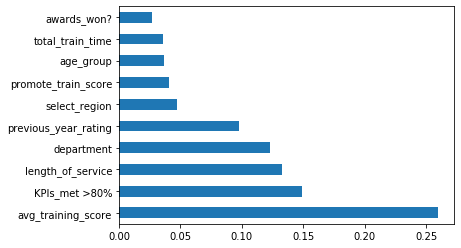

In [129]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

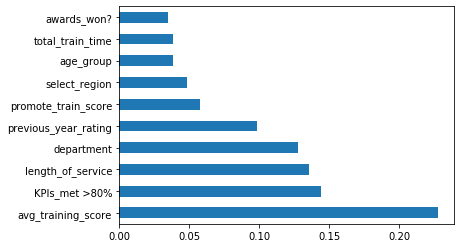

In [130]:
feat_importances = pd.Series(extra.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

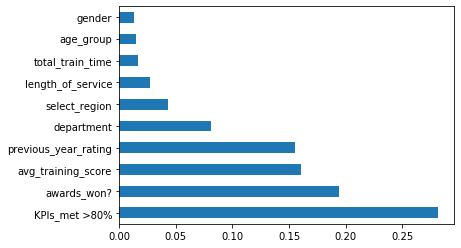

In [131]:
feat_importances = pd.Series(xgb.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [136]:
sub1 = pd.read_csv("sub.csv")

In [137]:
sub1

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [138]:
sub1["is_promoted"] = xgb.predict(df_test).astype("int")
sub1.to_csv("sub2.csv" , index = False)


In [140]:
sub1["is_promoted"].value_counts()

0    17446
1     6044
Name: is_promoted, dtype: int64